# A game of Hide and Seek

## Imports

In [1]:
import itertools

import numpy as np
import matplotlib.pyplot as plt 

from hide_and_seek.envs import HideAndSeekEnv, GameAction
from hide_and_seek.agents import DeterministicSeeker, QLearningHider, SarsaHider
from hide_and_seek.agents import ConstScheduler, LinearScheduler, ExponentialScheduler

from tqdm.notebook import tqdm
from time import sleep

def smooth_list(xs, smooth_window = 50):
    smoothed_xs = []
    for i in range(smooth_window, len(xs) - smooth_window):
        smoothed_xs.append(np.mean(xs[i-smooth_window:i+smooth_window]))
        
    return smoothed_xs

def simulate(env, seeker_agent, hider_agent):
    turn = 0
    state = env.reset()

    print("## State at turn: %i\n" % turn)
    print(env)

    while True:
        turn += 1
        seeker_actions = seeker_agent.get_action(state)
        hider_actions = hider_agent.get_action(state)

        game_action = GameAction(seeker_actions=seeker_actions, hider_actions=hider_actions)
        state, reward, done = env.step(action=game_action)

        seeker_agent.total_reward += reward.total_seeker_reward
        hider_agent.total_reward += reward.total_hider_reward

        print("## Turn: %i" % turn)
        print("\tSeeker actions: %s " % str(game_action.seeker_actions))
        print("\tSeeker reward: %6.2f" % seeker_agent.total_reward)

        print("\tHider actions: %s " % str(game_action.hider_actions))
        print("\tHider reward: %6.2f" % hider_agent.total_reward)

        print(env)

        sleep(0.5)

        if done:
            break

## Q Learning

### Experiment schedulers

In [2]:
env = HideAndSeekEnv(max_turns=20)
seeker_agent = DeterministicSeeker(env.w, env.h)

EPSILON_SCHEDULER_CLASS = [(ConstScheduler, {"epsilon": 0.1}), (LinearScheduler, {}), (ExponentialScheduler, {})]
LEARNING_RATE = 0.1
DISCOUNT_FACTOR = 0.9

stats = {}

for esc in tqdm(EPSILON_SCHEDULER_CLASS):
    q_hider_agent = QLearningHider(env, seeker_agent, num_episodes=10_000, discount_factor=DISCOUNT_FACTOR, 
                               alpha=LEARNING_RATE, epsilon_scheduler=esc[0](**esc[1]))
    
    stats[f"eps={esc[0]}"] = q_hider_agent.stats

  0%|          | 0/3 [00:00<?, ?it/s]

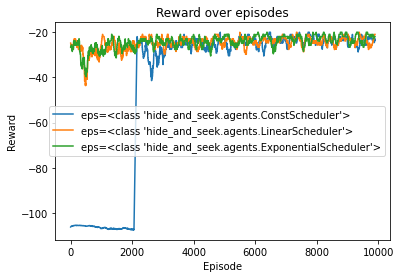

{"eps=<class 'hide_and_seek.agents.ConstScheduler'>": -42.4949, "eps=<class 'hide_and_seek.agents.LinearScheduler'>": -24.7965, "eps=<class 'hide_and_seek.agents.ExponentialScheduler'>": -24.2647}
Best is eps=<class 'hide_and_seek.agents.ExponentialScheduler'>


In [3]:
mean_stats = {}

for label in stats:
    smoothed_stat = smooth_list(stats[label])
    mean_stats[label] = np.mean(stats[label])
    
    plt.plot(smoothed_stat, label=label)
    
plt.title("Reward over episodes")
plt.xlabel("Episode")
plt.ylabel("Reward")

plt.legend()
plt.show()

print(mean_stats)
print(f"Best is {max(mean_stats, key=mean_stats.get)}")

### Experiment learning rate

In [4]:
env = HideAndSeekEnv(max_turns=20)
seeker_agent = DeterministicSeeker(env.w, env.h)

EPSILON_SCHEDULER_CLASS = ExponentialScheduler()
LEARNING_RATE = [0.1, 0.5]
DISCOUNT_FACTOR = 0.9

stats = {}

for lr in tqdm(LEARNING_RATE):
    q_hider_agent = QLearningHider(env, seeker_agent, num_episodes=10_000, discount_factor=DISCOUNT_FACTOR, 
                               alpha=lr, epsilon_scheduler=EPSILON_SCHEDULER_CLASS)
    
    stats[f"lr={lr}"] = q_hider_agent.stats

  0%|          | 0/2 [00:00<?, ?it/s]

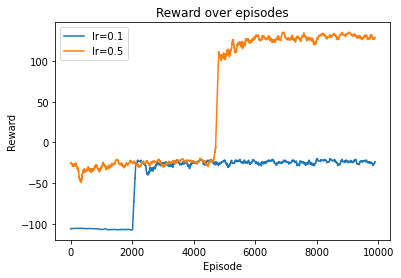

{'lr=0.1': -42.2137, 'lr=0.5': 52.7007}
Best is lr=0.5


In [5]:
mean_stats = {}

for label in stats:
    smoothed_stat = smooth_list(stats[label])
    mean_stats[label] = np.mean(stats[label])
    
    plt.plot(smoothed_stat, label=label)
    
plt.title("Reward over episodes")
plt.xlabel("Episode")
plt.ylabel("Reward")

plt.legend()
plt.show()

print(mean_stats)
print(f"Best is {max(mean_stats, key=mean_stats.get)}")

### Experiment discount factor

In [6]:
env = HideAndSeekEnv(max_turns=20)
seeker_agent = DeterministicSeeker(env.w, env.h)

EPSILON_SCHEDULER_CLASS = ExponentialScheduler()
LEARNING_RATE = 0.5
DISCOUNT_FACTOR = [0.9, 0.99, 1.0]

stats = {}

for df in tqdm(DISCOUNT_FACTOR):
    q_hider_agent = QLearningHider(env, seeker_agent, num_episodes=10_000, discount_factor=df, 
                               alpha=LEARNING_RATE, epsilon_scheduler=EPSILON_SCHEDULER_CLASS)
    
    stats[f"df={df}"] = q_hider_agent.stats

  0%|          | 0/3 [00:00<?, ?it/s]

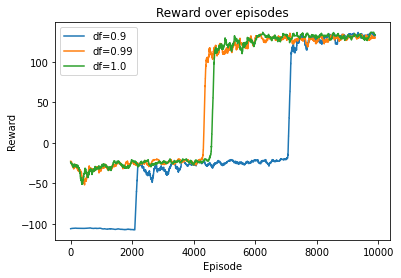

{'df=0.9': -0.0764, 'df=0.99': 58.0343, 'df=1.0': 55.9737}
Best is df=0.99


In [7]:
mean_stats = {}

for label in stats:
    smoothed_stat = smooth_list(stats[label])
    mean_stats[label] = np.mean(stats[label])
    
    plt.plot(smoothed_stat, label=label)
    
plt.title("Reward over episodes")
plt.xlabel("Episode")
plt.ylabel("Reward")

plt.legend()
plt.show()

print(mean_stats)
print(f"Best is {max(mean_stats, key=mean_stats.get)}")

## Sarsa

### Experiment schedulers

In [11]:
env = HideAndSeekEnv(max_turns=20)
seeker_agent = DeterministicSeeker(env.w, env.h)

EPSILON_SCHEDULER_CLASS = [(ConstScheduler, {"epsilon": 0.1}), (LinearScheduler, {}), (ExponentialScheduler, {})]
LEARNING_RATE = 0.1
DISCOUNT_FACTOR = 0.9

stats = {}

for esc in tqdm(EPSILON_SCHEDULER_CLASS):
    s_hider_agent = SarsaHider(env, seeker_agent, num_episodes=10_000, discount_factor=DISCOUNT_FACTOR, 
                               alpha=LEARNING_RATE, epsilon_scheduler=esc[0](**esc[1]))
    
    stats[f"eps={esc[0]}"] = s_hider_agent.stats

  0%|          | 0/3 [00:00<?, ?it/s]

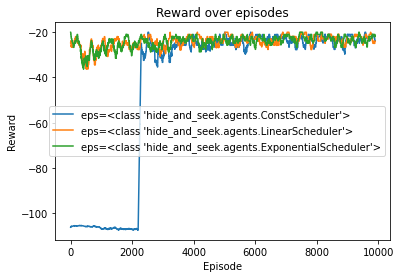

{"eps=<class 'hide_and_seek.agents.ConstScheduler'>": -43.2736, "eps=<class 'hide_and_seek.agents.LinearScheduler'>": -24.0334, "eps=<class 'hide_and_seek.agents.ExponentialScheduler'>": -24.1928}
Best is eps=<class 'hide_and_seek.agents.LinearScheduler'>


In [12]:
mean_stats = {}

for label in stats:
    smoothed_stat = smooth_list(stats[label])
    mean_stats[label] = np.mean(stats[label])
    
    plt.plot(smoothed_stat, label=label)
    
plt.title("Reward over episodes")
plt.xlabel("Episode")
plt.ylabel("Reward")

plt.legend()
plt.show()

print(mean_stats)
print(f"Best is {max(mean_stats, key=mean_stats.get)}")

### Experiment learning rate

In [13]:
env = HideAndSeekEnv(max_turns=20)
seeker_agent = DeterministicSeeker(env.w, env.h)

EPSILON_SCHEDULER_CLASS = ExponentialScheduler()
LEARNING_RATE = [0.1, 0.5]
DISCOUNT_FACTOR = 0.9

stats = {}

for lr in tqdm(LEARNING_RATE):
    s_hider_agent = SarsaHider(env, seeker_agent, num_episodes=10_000, discount_factor=DISCOUNT_FACTOR, 
                               alpha=lr, epsilon_scheduler=EPSILON_SCHEDULER_CLASS)
    
    stats[f"lr={lr}"] = s_hider_agent.stats

  0%|          | 0/2 [00:00<?, ?it/s]

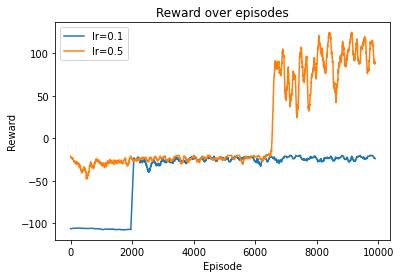

{'lr=0.1': -41.4018, 'lr=0.5': 12.5591}
Best is lr=0.5


In [14]:
mean_stats = {}

for label in stats:
    smoothed_stat = smooth_list(stats[label])
    mean_stats[label] = np.mean(stats[label])
    
    plt.plot(smoothed_stat, label=label)
    
plt.title("Reward over episodes")
plt.xlabel("Episode")
plt.ylabel("Reward")

plt.legend()
plt.show()

print(mean_stats)
print(f"Best is {max(mean_stats, key=mean_stats.get)}")

### Experiment discount factor

In [15]:
env = HideAndSeekEnv(max_turns=20)
seeker_agent = DeterministicSeeker(env.w, env.h)

EPSILON_SCHEDULER_CLASS = ExponentialScheduler()
LEARNING_RATE = 0.5
DISCOUNT_FACTOR = [0.9, 0.99, 1.0]

stats = {}

for df in tqdm(DISCOUNT_FACTOR):
    s_hider_agent = SarsaHider(env, seeker_agent, num_episodes=10_000, discount_factor=df, 
                               alpha=LEARNING_RATE, epsilon_scheduler=EPSILON_SCHEDULER_CLASS)
    
    stats[f"df={df}"] = s_hider_agent.stats

  0%|          | 0/3 [00:00<?, ?it/s]

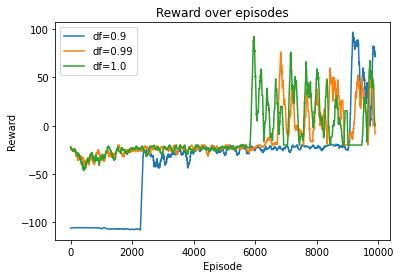

{'df=0.9': -37.5009, 'df=0.99': -12.4424, 'df=1.0': -9.8177}
Best is df=1.0


In [16]:
mean_stats = {}

for label in stats:
    smoothed_stat = smooth_list(stats[label])
    mean_stats[label] = np.mean(stats[label])
    
    plt.plot(smoothed_stat, label=label)
    
plt.title("Reward over episodes")
plt.xlabel("Episode")
plt.ylabel("Reward")

plt.legend()
plt.show()

print(mean_stats)
print(f"Best is {max(mean_stats, key=mean_stats.get)}")

## QLearning and Sarsa comparison

In [17]:
env = HideAndSeekEnv(max_turns=20)
seeker_agent = DeterministicSeeker(env.w, env.h)
q_hider_agent = QLearningHider(env, seeker_agent, num_episodes=10_000, discount_factor=1.0, alpha=0.5, epsilon_scheduler=ExponentialScheduler())
s_hider_agent = SarsaHider(env, seeker_agent, num_episodes=10_000, discount_factor=1.0, alpha=0.5, epsilon_scheduler=ExponentialScheduler())

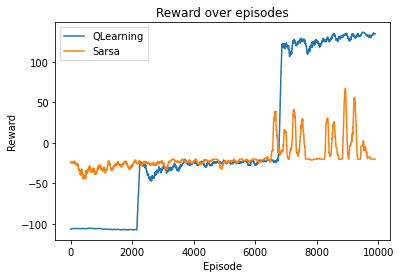

{'QLearning': 3.4298, 'Sarsa': -17.6183}
Best is QLearning


In [18]:
mean_stats = {}

label = "QLearning"
smoothed_stat = smooth_list(q_hider_agent.stats)
mean_stats[label] = np.mean(q_hider_agent.stats)
plt.plot(smoothed_stat, label=label)
    
label = "Sarsa"
smoothed_stat = smooth_list(s_hider_agent.stats)
mean_stats[label] = np.mean(s_hider_agent.stats)
plt.plot(smoothed_stat, label=label)
    
plt.title("Reward over episodes")
plt.xlabel("Episode")
plt.ylabel("Reward")

plt.legend()
plt.show()

print(mean_stats)
print(f"Best is {max(mean_stats, key=mean_stats.get)}")

In [19]:
simulate(env, seeker_agent, q_hider_agent)

## State at turn: 0

  | 0| 1| 2| 3| 4| 5| 6| 7|
--+--+--+--+--+--+--+--+--+
 8|XX|XX|XX|XX|XX|XX|XX|XX|
  |XX|XX|XX|XX|XX|XX|XX|XX|
--+--+--+--+--+--+--+--+--+
 7|XX|  |  |  |  |  |  |XX|
  |XX|  |  |  |  |  |  |XX|
--+--+--+--+--+--+--+--+--+
 6|XX|  |XX|XX|XX|XX|  |XX|
  |XX|  |XX|XX|XX|XX|  |XX|
--+--+--+--+--+--+--+--+--+
 5|XX|  |XX|  |  |  |  |XX|
  |XX|  |XX|  |  |  |  |XX|
--+--+--+--+--+--+--+--+--+
 4|XX|  |XX|  |~~|XX|  |XX|
  |XX|  |XX|  |~~|XX|  |XX|
--+--+--+--+--+--+--+--+--+
 3|XX|S1|XX|  |  |XX|  |XX|
  |XX|  |XX|  |  |XX|  |XX|
--+--+--+--+--+--+--+--+--+
 2|XX|  |XX|XX|XX|XX|H1|XX|
  |XX|  |XX|XX|XX|XX|  |XX|
--+--+--+--+--+--+--+--+--+
 1|XX|  |  |  |  |  |H2|XX|
  |XX|  |  |  |  |  |  |XX|
--+--+--+--+--+--+--+--+--+
 0|XX|XX|XX|XX|XX|XX|XX|XX|
  |XX|XX|XX|XX|XX|XX|XX|XX|
--+--+--+--+--+--+--+--+--+

## Turn: 1
	Seeker actions: {1: <Action.EAST: (1, <GridOrientation.EAST: (1, 1, 0, '>')>, 'E')>, 2: <Action.EAST: (1, <GridOrientation.EAST: (1, 1, 0, '>')>, 'E')>} 


## Turn: 8
	Seeker actions: {1: <Action.EAST: (1, <GridOrientation.EAST: (1, 1, 0, '>')>, 'E')>, 2: <Action.EAST: (1, <GridOrientation.EAST: (1, 1, 0, '>')>, 'E')>} 
	Seeker reward:  -8.00
	Hider actions: {1: <Action.SOUTH: (2, <GridOrientation.SOUTH: (2, 0, -1, 'v')>, 'S')>, 2: <Action.SOUTH: (2, <GridOrientation.SOUTH: (2, 0, -1, 'v')>, 'S')>} 
	Hider reward:  -8.00
  | 0| 1| 2| 3| 4| 5| 6| 7|
--+--+--+--+--+--+--+--+--+
 8|XX|XX|XX|XX|XX|XX|XX|XX|
  |XX|XX|XX|XX|XX|XX|XX|XX|
--+--+--+--+--+--+--+--+--+
 7|XX|  |  |  |  |  |  |XX|
  |XX|  |  |  |  |  |  |XX|
--+--+--+--+--+--+--+--+--+
 6|XX|  |XX|XX|XX|XX|  |XX|
  |XX|  |XX|XX|XX|XX|  |XX|
--+--+--+--+--+--+--+--+--+
 5|XX|  |XX|  |  |  |  |XX|
  |XX|  |XX|  |  |  |  |XX|
--+--+--+--+--+--+--+--+--+
 4|XX|  |XX|H1|~~|XX|  |XX|
  |XX|  |XX|  |~~|XX|  |XX|
--+--+--+--+--+--+--+--+--+
 3|XX|S1|XX|  |  |XX|  |XX|
  |XX|  |XX|  |  |XX|  |XX|
--+--+--+--+--+--+--+--+--+
 2|XX|  |XX|XX|XX|XX|  |XX|
  |XX|  |XX|XX|XX|XX|  |XX|
--+--+--+--+-

In [20]:
simulate(env, seeker_agent, s_hider_agent)

## State at turn: 0

  | 0| 1| 2| 3| 4| 5| 6| 7|
--+--+--+--+--+--+--+--+--+
 8|XX|XX|XX|XX|XX|XX|XX|XX|
  |XX|XX|XX|XX|XX|XX|XX|XX|
--+--+--+--+--+--+--+--+--+
 7|XX|  |  |  |  |  |  |XX|
  |XX|  |  |  |  |  |  |XX|
--+--+--+--+--+--+--+--+--+
 6|XX|  |XX|XX|XX|XX|  |XX|
  |XX|  |XX|XX|XX|XX|  |XX|
--+--+--+--+--+--+--+--+--+
 5|XX|  |XX|  |  |  |  |XX|
  |XX|  |XX|  |  |  |  |XX|
--+--+--+--+--+--+--+--+--+
 4|XX|  |XX|  |~~|XX|  |XX|
  |XX|  |XX|  |~~|XX|  |XX|
--+--+--+--+--+--+--+--+--+
 3|XX|S1|XX|  |  |XX|  |XX|
  |XX|  |XX|  |  |XX|  |XX|
--+--+--+--+--+--+--+--+--+
 2|XX|  |XX|XX|XX|XX|H1|XX|
  |XX|  |XX|XX|XX|XX|  |XX|
--+--+--+--+--+--+--+--+--+
 1|XX|  |  |  |  |  |H2|XX|
  |XX|  |  |  |  |  |  |XX|
--+--+--+--+--+--+--+--+--+
 0|XX|XX|XX|XX|XX|XX|XX|XX|
  |XX|XX|XX|XX|XX|XX|XX|XX|
--+--+--+--+--+--+--+--+--+

## Turn: 1
	Seeker actions: {1: <Action.EAST: (1, <GridOrientation.EAST: (1, 1, 0, '>')>, 'E')>, 2: <Action.EAST: (1, <GridOrientation.EAST: (1, 1, 0, '>')>, 'E')>} 


## Turn: 8
	Seeker actions: {1: <Action.EAST: (1, <GridOrientation.EAST: (1, 1, 0, '>')>, 'E')>, 2: <Action.EAST: (1, <GridOrientation.EAST: (1, 1, 0, '>')>, 'E')>} 
	Seeker reward: -20.00
	Hider actions: {1: <Action.NORTH: (0, <GridOrientation.NORTH: (0, 0, 1, '^')>, 'N')>, 2: <Action.NOP: (4, None, 'Nop')>} 
	Hider reward:  -8.00
  | 0| 1| 2| 3| 4| 5| 6| 7|
--+--+--+--+--+--+--+--+--+
 8|XX|XX|XX|XX|XX|XX|XX|XX|
  |XX|XX|XX|XX|XX|XX|XX|XX|
--+--+--+--+--+--+--+--+--+
 7|XX|  |  |  |  |  |  |XX|
  |XX|  |  |  |  |  |  |XX|
--+--+--+--+--+--+--+--+--+
 6|XX|  |XX|XX|XX|XX|  |XX|
  |XX|  |XX|XX|XX|XX|  |XX|
--+--+--+--+--+--+--+--+--+
 5|XX|  |XX|  |H2|  |H1|XX|
  |XX|  |XX|  |  |  |  |XX|
--+--+--+--+--+--+--+--+--+
 4|XX|  |XX|  |~~|XX|  |XX|
  |XX|  |XX|  |~~|XX|  |XX|
--+--+--+--+--+--+--+--+--+
 3|XX|S1|XX|  |  |XX|  |XX|
  |XX|  |XX|  |  |XX|  |XX|
--+--+--+--+--+--+--+--+--+
 2|XX|  |XX|XX|XX|XX|  |XX|
  |XX|  |XX|XX|XX|XX|  |XX|
--+--+--+--+--+--+--+--+--+
 1|XX|  |  |  |  |  | 

## Turn: 15
	Seeker actions: {1: <Action.EAST: (1, <GridOrientation.EAST: (1, 1, 0, '>')>, 'E')>, 2: <Action.EAST: (1, <GridOrientation.EAST: (1, 1, 0, '>')>, 'E')>} 
	Seeker reward: -27.00
	Hider actions: {1: <Action.SOUTH: (2, <GridOrientation.SOUTH: (2, 0, -1, 'v')>, 'S')>, 2: <Action.SOUTH: (2, <GridOrientation.SOUTH: (2, 0, -1, 'v')>, 'S')>} 
	Hider reward: -15.00
  | 0| 1| 2| 3| 4| 5| 6| 7|
--+--+--+--+--+--+--+--+--+
 8|XX|XX|XX|XX|XX|XX|XX|XX|
  |XX|XX|XX|XX|XX|XX|XX|XX|
--+--+--+--+--+--+--+--+--+
 7|XX|  |  |  |  |  |  |XX|
  |XX|  |  |  |  |  |  |XX|
--+--+--+--+--+--+--+--+--+
 6|XX|  |XX|XX|XX|XX|  |XX|
  |XX|  |XX|XX|XX|XX|  |XX|
--+--+--+--+--+--+--+--+--+
 5|XX|  |XX|  |  |  |  |XX|
  |XX|  |XX|  |  |  |  |XX|
--+--+--+--+--+--+--+--+--+
 4|XX|  |XX|H1|~~|XX|  |XX|
  |XX|  |XX|  |~~|XX|  |XX|
--+--+--+--+--+--+--+--+--+
 3|XX|S1|XX|H2|  |XX|  |XX|
  |XX|  |XX|  |  |XX|  |XX|
--+--+--+--+--+--+--+--+--+
 2|XX|  |XX|XX|XX|XX|  |XX|
  |XX|  |XX|XX|XX|XX|  |XX|
--+--+--+--+